# Brain Tumor Classification
## Kaggle Coding Challenge
The challenge and data is available on https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri?select=Training.
### Task
The primary goal of the data-set is to be used for classification. Building a CNN (convolutional neural network) models that can classify these MRI into four classes.
- No Tumor
- Benign Tumor
- Malignant Tumor
- Pituitary Tumor

### Import Data

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
imgsize = (200, 200)


gilomia_img = []

for i in range(1, 827):
    img = Image.open('Training/glioma_tumor/gg'+str(i)+'.jpg')
    img = np.array(img.resize(imgsize, Image.ANTIALIAS))
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    gilomia_img.append(img.reshape(-1,1))

meningioma_img = []

for i in range(1, 822):
    img = Image.open('Training/meningioma_tumor/m'+str(i)+'.jpg')
    img = np.array(img.resize(imgsize, Image.ANTIALIAS))
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    meningioma_img.append(img.reshape(-1,1))

no_img = []

for i in range(1, 396):
    img = Image.open('Training/no_tumor/no'+str(i)+'.jpg')
    img = np.array(img.resize(imgsize, Image.ANTIALIAS))
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    no_img.append(img.reshape(-1,1))

pituitary_img = []

for i in range(1, 827):
    img = Image.open('Training/pituitary_tumor/p'+str(i)+'.jpg')
    img = np.array(img.resize(imgsize, Image.ANTIALIAS))
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    pituitary_img.append(img.reshape(-1,1))

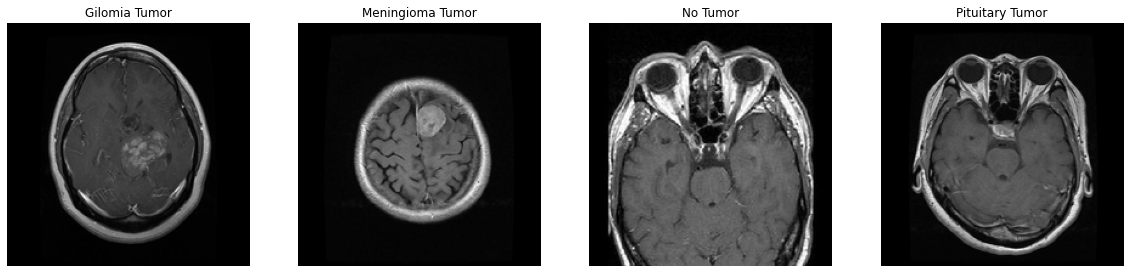

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('Gilomia Tumor')
plt.imshow(gilomia_img[0].reshape(imgsize), cmap='gray')
plt.axis('off')
plt.subplot(1,4,2)
plt.title('Meningioma Tumor')
plt.imshow(meningioma_img[0].reshape(imgsize), cmap='gray')
plt.axis('off')
plt.subplot(1,4,3)
plt.title('No Tumor')
plt.imshow(no_img[0].reshape(imgsize), cmap='gray')
plt.axis('off')
plt.subplot(1,4,4)
plt.title('Pituitary Tumor')
plt.imshow(pituitary_img[0].reshape(imgsize), cmap='gray')
plt.axis('off')
plt.show()

In [20]:
gilomia_img = np.array(gilomia_img).reshape(-1,200**2)
meningioma_img = np.array(meningioma_img).reshape(-1,200**2)
no_img = np.array(no_img).reshape(-1,200**2)
pituitary_img = np.array(pituitary_img).reshape(-1,200**2)

label1 = np.zeros(no_img.shape[0])
label2 = np.ones(gilomia_img.shape[0])
label3 = np.ones(meningioma_img.shape[0])*2
label4 = np.ones(pituitary_img.shape[0])*3

Encoding of Tumor Types:
- no tumor: 0
- gilomia: 1
- meningioma: 2
- pituitary: 3

### Build Training Database
Randomly permuted order of images.

In [21]:
from tensorflow.keras.utils import to_categorical

train_img = np.concatenate((no_img,gilomia_img,meningioma_img,pituitary_img), axis=0)
train_label = np.concatenate((label1, label2, label3, label4))

perm = np.random.permutation(len(train_label))
train_img = train_img[perm,:]
train_label = train_label[perm]


### Build Convolutional Neural Network

In [22]:
from tensorflow.keras import models, layers
import tensorflow as tf

CNN = models.Sequential()
CNN.add(layers.Conv2D(filters=64, kernel_size=(5,5),padding='Same', activation='relu', input_shape=(200,200,1)))
CNN.add(layers.BatchNormalization())
CNN.add(layers.Conv2D(filters=64, kernel_size=(5,5), padding='Same', activation='relu'))
CNN.add(layers.BatchNormalization())
CNN.add(layers.MaxPool2D(pool_size=(2,2), padding='Same'))
CNN.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
CNN.add(layers.BatchNormalization())
CNN.add(layers.MaxPool2D(pool_size=(2,2), padding='Same'))
CNN.add(layers.Flatten())
CNN.add(layers.Dense(100, activation='relu'))
CNN.add(layers.Dense(40, activation='relu'))
CNN.add(layers.Dense(4, activation='softmax'))

CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 64)      1664      
_________________________________________________________________
batch_normalization_8 (Batch (None, 200, 200, 64)      256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 200, 200, 64)      102464    
_________________________________________________________________
batch_normalization_9 (Batch (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100, 100, 64)     

### Train Model

In [23]:
# Reformat train images for CNN feed
train_img = train_img.reshape(-1, 200, 200, 1)

CNN.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
progress = CNN.fit(train_img, train_label, epochs=2)

Epoch 1/2
90/90 [==============================] - 470s 5s/step - loss: 8.4667 - accuracy: 0.5505

## Prediction on Testdata
### Import  Testdata

In [38]:
#model_88 = tf.keras.models.load_model('CNN_88perc_accuracy.h5')
#model_88.summary()

gilomia_img_test = []

for i in range(1, 51):
    img = Image.open('Training/glioma_tumor/gg'+str(i)+'.jpg')
    img = np.array(img.resize(imgsize, Image.ANTIALIAS))
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    gilomia_img_test.append(img.reshape(-1,1))

meningioma_img_test = []

for i in range(1, 51):
    img = Image.open('Training/meningioma_tumor/m'+str(i)+'.jpg')
    img = np.array(img.resize(imgsize, Image.ANTIALIAS))
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    meningioma_img_test.append(img.reshape(-1,1))

no_img_test = []

for i in range(1, 51):
    img = Image.open('Training/no_tumor/no'+str(i)+'.jpg')
    img = np.array(img.resize(imgsize, Image.ANTIALIAS))
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    no_img_test.append(img.reshape(-1,1))

pituitary_img_test = []

for i in range(1, 51):
    img = Image.open('Training/pituitary_tumor/p'+str(i)+'.jpg')
    img = np.array(img.resize(imgsize, Image.ANTIALIAS))
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    pituitary_img_test.append(img.reshape(-1,1))

gilomia_img_test = np.array(gilomia_img_test).reshape(-1,200**2)
meningioma_img_test = np.array(meningioma_img_test).reshape(-1,200**2)
no_img_test = np.array(no_img_test).reshape(-1,200**2)
pituitary_img_test = np.array(pituitary_img_test).reshape(-1,200**2)

label1 = np.zeros(no_img_test.shape[0])
label2 = np.ones(gilomia_img_test.shape[0])
label3 = np.ones(meningioma_img_test.shape[0])*2
label4 = np.ones(pituitary_img_test.shape[0])*3

test_img = np.concatenate((no_img_test,gilomia_img_test,meningioma_img_test,pituitary_img_test), axis=0)
test_label = np.concatenate((label1, label2, label3, label4))

perm = np.random.permutation(len(test_label))
test_img = test_img[perm,:]
test_label = test_label[perm]

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

test_img = test_img.reshape(-1, 200, 200, 1)

pred = CNN.predict(test_img)

pred = np.argmax(pred, axis=1)

print('Evaluation of Model:')
print('Accuracy:', accuracy_score(test_label, pred))
print('Confusion Matrix:')
print(confusion_matrix(test_label, pred))

Evaluation of Model:
Accuracy: 0.88
Confusion Matrix:
[[48  1  0  1]
 [ 1 39 10  0]
 [ 0  6 39  5]
 [ 0  0  0 50]]


### Visualise Prediction

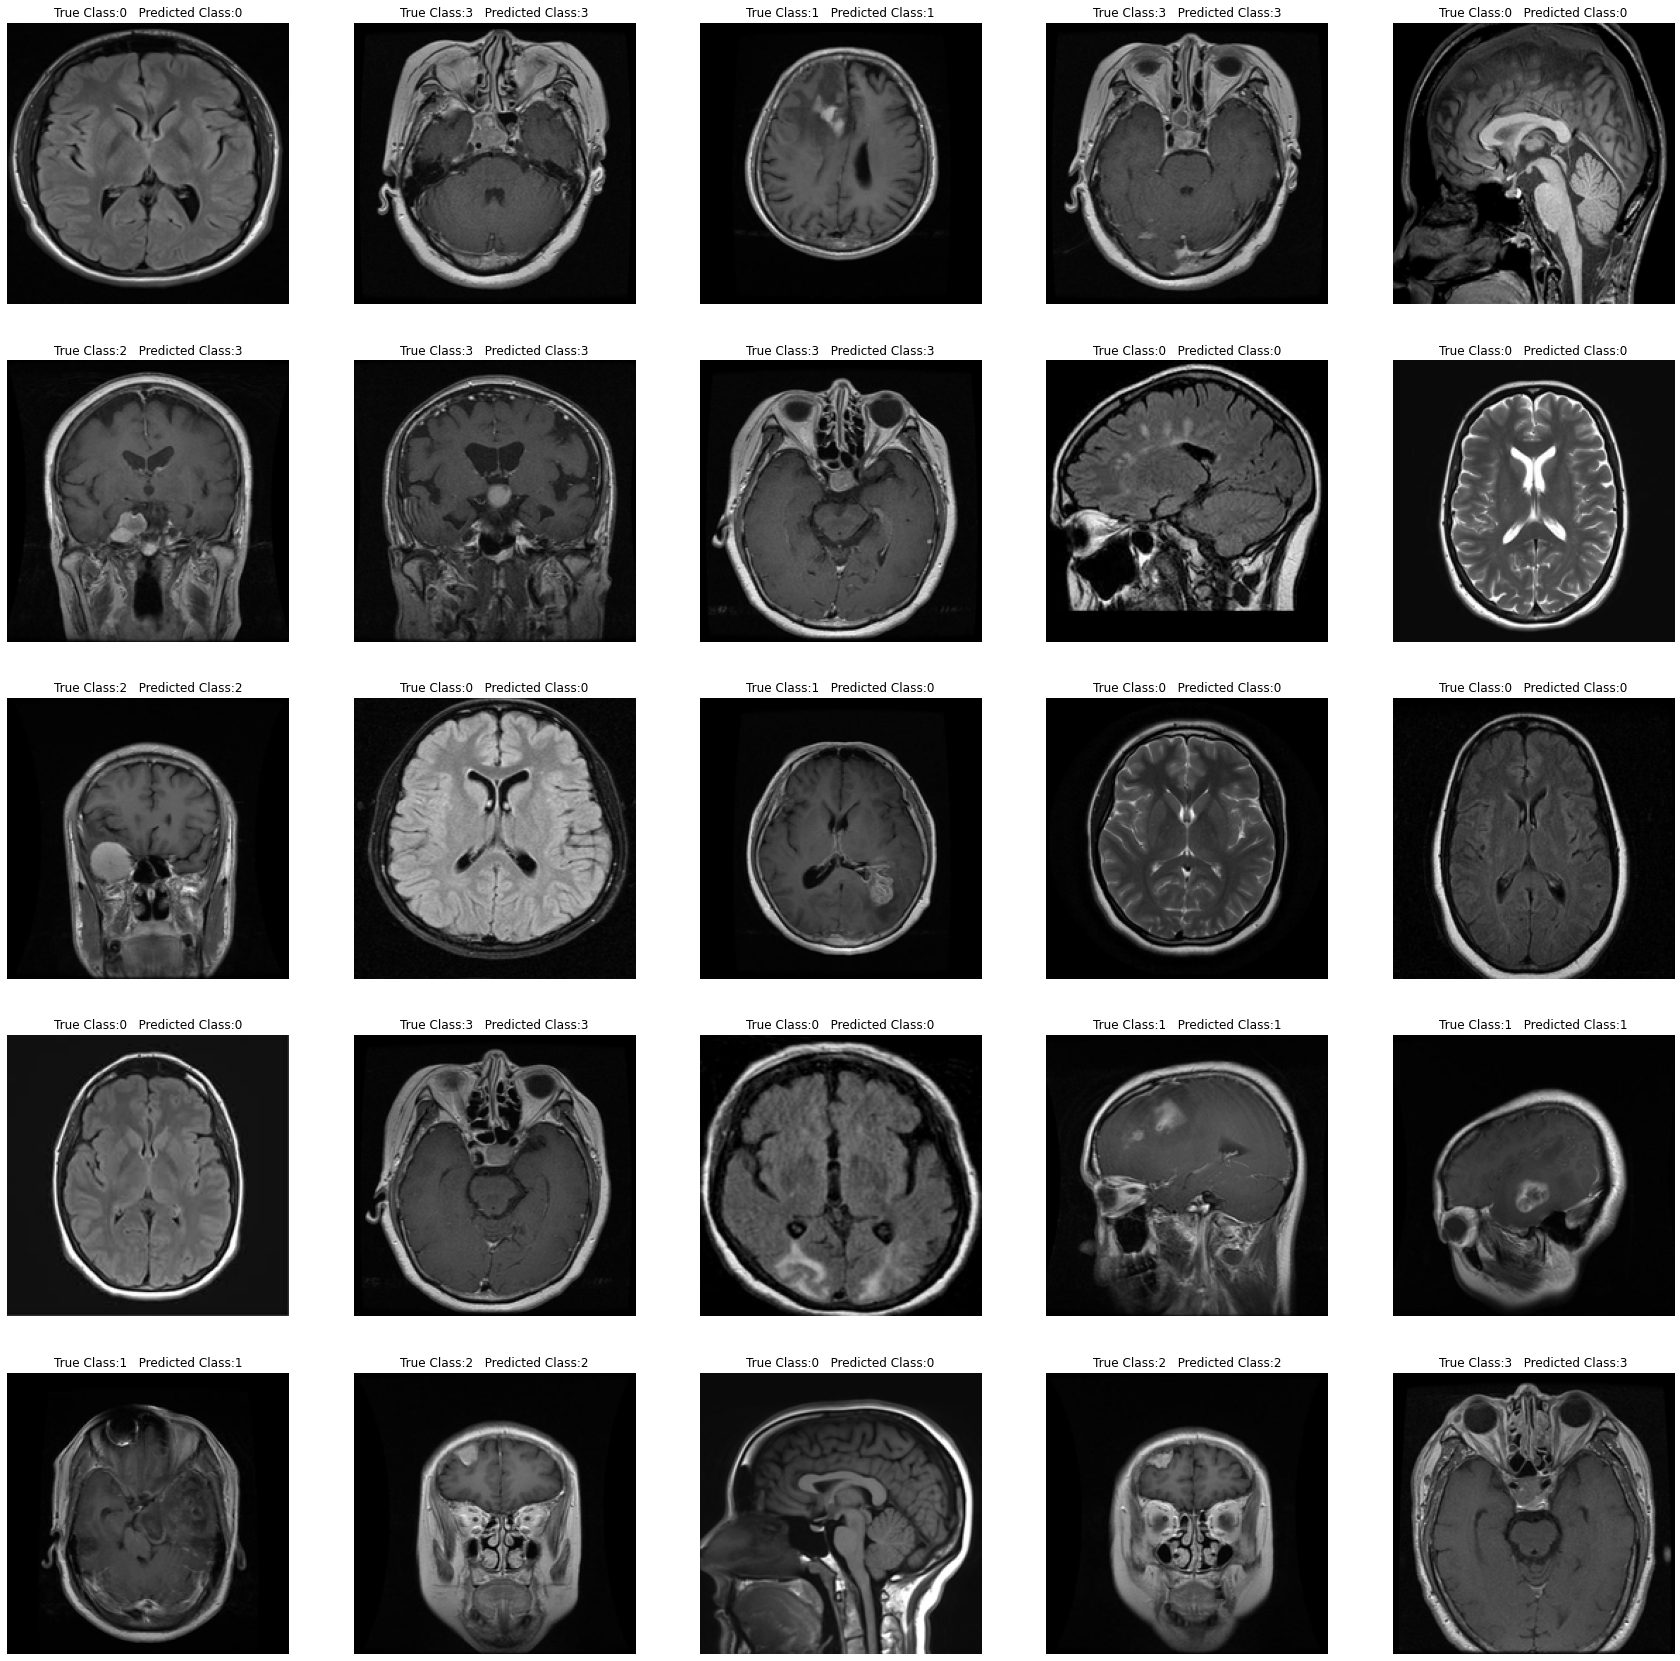

In [44]:
plt.figure(figsize=(30,30))
for i in range(40,65):
    plt.subplot(5,5,i-39)
    plt.imshow(test_img[i,:,:,:], cmap='gray')
    plt.title('True Class:'+str(int(test_label[i]))+'   Predicted Class:'+str(pred[i]))
    plt.axis('off')

#CNN.save('CNN_88perc_accuracy.h5')

### Conclusion
The model in this specific configuration has an accuracy of 88%, which is very high.
If we have a look at the confusion matrix, there can even been seen, that only
one person is predicted to have no tumor, even though he had one, such that the
most critical error is avoided the most. Also, the identification of pituitary was very accurate.
Te most problems in the model occur predicting and distinguishing between
the gilomia and meningioma tumors.